## Exploring Trends in North America

Are there any trends in sentiment, aggression, or stance over time in North America? Are there any trends that coincide with current events? 

### Imports

In [27]:
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress
import numpy as np
from scipy.optimize import curve_fit

In [3]:
# Import Data
path = os.path.join("Resources", "NA_sample_020.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness
0,8037902,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive
1,8790126,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive
2,11647260,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive
3,11810796,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive
4,13183104,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive


### Set Up DataFrame

In [4]:
# Create new df with column with month and date
dates = pd.to_datetime(df["created_at"], infer_datetime_format=True)
df_month = df.loc[:, ["created_at", "lat", "lng", "sentiment", "topic", "stance", "gender", "aggressiveness"]]
df_month["created_at"] = dates
df_month['date'] = df_month['created_at'].dt.to_period('M')

#Add a column for the year
df_month['year'] = df_month['created_at'].dt.year

df_month.head()

/Users/jennifershulyak/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018


# Looking at Stance, Aggression, and Sentiment Over Time

In [15]:
# Create new column for agressiveness factor
df_month["aggressiveness_factor"] = " "
df_month["stance_factor"] = " "

#Loop through df and change the ag factor to 0 1 depending on the agressiveness
for index, row in df_month.iterrows():
    if row["aggressiveness"] == "aggressive":
        df_month.loc[index, "aggressiveness_factor"] = 100.0
    else:
        df_month.loc[index, "aggressiveness_factor"] = 0.0 

    if row["stance"] == "believer":
        df_month.loc[index, "stance_factor"] = 100.0
    else:
        df_month.loc[index, "stance_factor"] = 0.0

df_month.head()

,created_at,lat,lng,sentiment,topic,stance,gender,aggressiveness,date,year,aggressiveness_factor,stance_factor
0,2018-01-31 20:40:44+00:00,40.441694,-79.990086,-0.120697,Politics,believer,male,aggressive,2018-01,2018,100.0,100.0
1,2018-03-15 21:28:05+00:00,38.895110,-77.036370,-0.378573,Global stance,believer,male,not aggressive,2018-03,2018,0.0,100.0
2,2018-09-29 14:42:56+00:00,44.000340,-72.749830,-0.216689,Politics,believer,female,not aggressive,2018-09,2018,0.0,100.0
3,2018-10-08 22:23:50+00:00,39.952330,-75.163790,-0.687731,Global stance,believer,female,not aggressive,2018-10,2018,0.0,100.0
4,2018-12-16 11:52:40+00:00,45.421106,-75.690308,0.611834,Weather Extremes,believer,male,not aggressive,2018-12,2018,0.0,100.0


In [16]:
# Change the type for the factors to be floats
df_month = df_month.astype({
    "aggressiveness_factor": "float64",
    "stance_factor": "float64"
})

# Take the Average Sentiment, aggressiveness, and stance for each month using Groupby
df_averages = df_month.groupby("date")[["aggressiveness_factor", "stance_factor", "sentiment"]].mean() 
# The aggressiveness and stance factors give the percentages of people who are aggressive or believe in climate change

### Plot Sentiment, Aggressiveness, and Stance Over Time

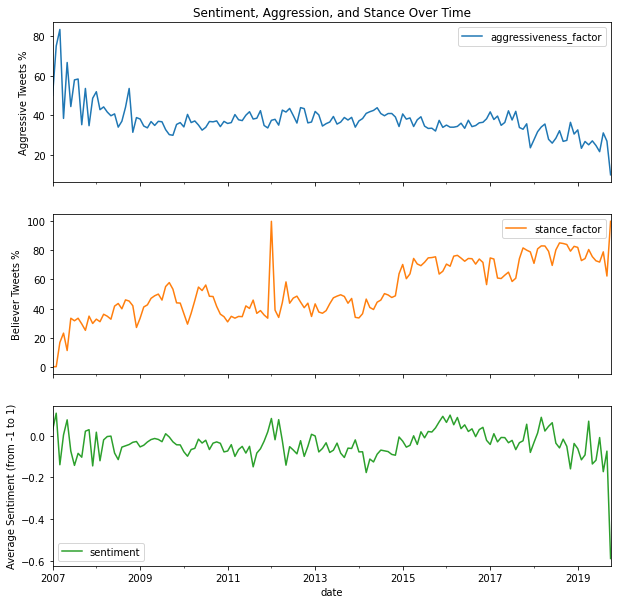

In [38]:
#Plot 
axes = df_averages.plot(subplots=True, figsize=(10, 10)); plt.legend(loc='best')
axes[0].set_ylabel("Aggressive Tweets %")
axes[0].legend(loc = "best")
axes[1].set_ylabel("Believer Tweets %")
axes[1].legend(loc = "best")
axes[2].set_ylabel("Average Sentiment (from -1 to 1)")
axes[0].set_title("Sentiment, Aggression, and Stance Over Time")

# Save plot
plt.savefig("Images/Q1_Trends.png")


## Analysis

blah

# Comparing the Number of Tweets that Support, are Neutral on, or Deny Climate Change

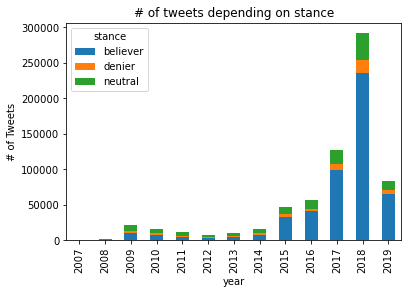

In [39]:
stance_df = df_month.groupby(["year", "stance"])["gender"].count()
stance_df.unstack().plot(kind='bar', stacked=True)
plt.ylabel("# of Tweets")
plt.title("# of tweets depending on stance")

# Save plot
plt.savefig("Images/Q1_StanceNumbers.png")

## Analysis:

blah

# Taking a Closer Look at Stance Over Time

In [36]:
# Make a data frame with just stance
series_stance = df_averages["stance_factor"]
df_stance = series_stance.to_frame()    # Convert the series back into a dataframe
df_stance.reset_index(inplace=True) # Reset the index so that Date is a column
df_stance["date"] = df_stance["date"].astype("datetime64")  # Convert the dates into date time format


### Linear Regression

In [33]:
x_values = [x for x in range(len(df_stance))] #list(df_stance["date"])
y = list(df_stance["stance_factor"])
y_values = [y for y in y]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = [float(x) * slope + intercept for x in x_values]
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))  

### Exponential Regression

In [34]:
def func_exp(x, a, b, c):
        return a * np.exp(b * x) + c
x_data = np.array(x_values) 
y_data = np.array(y_values)

popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = (-1, 0.01, 1))


# data_raw = plt.plot(x_data, y_data, 'o', label = "data")
# curve_exp = plt.plot(x_data, func_exp(x_data, *popt), color = "red", label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))



### Plot Both Regressions Together

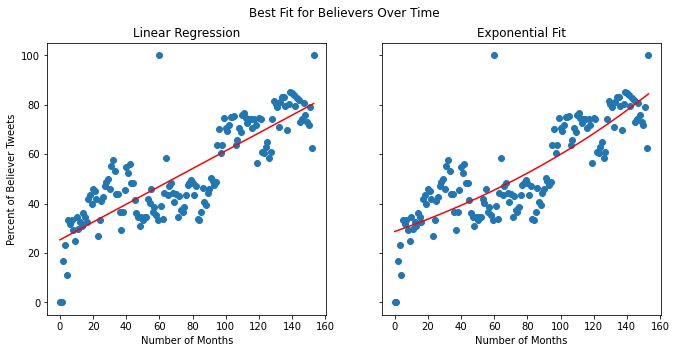

In [40]:
#
regression_stance, axs = plt.subplots(1, 2, figsize=(11, 5), sharey=True)

axs[0].scatter(x_data, y_data)
axs[0].plot(x_data, regress_values, color = "red")
axs[0].set_title("Linear Regression")
axs[0].set_xlabel("Number of Months")
axs[1].scatter(x_data, y_data)
axs[1].plot(x_data, func_exp(x_data, *popt), color = "red")
axs[1].set_title("Exponential Fit")
axs[1].set_xlabel("Number of Months")
axs[0].set_ylabel("Percent of Believer Tweets")
regression_stance.suptitle('Best Fit for Believers Over Time')

# Save plot
plt.savefig("Images/Q1_Stance_Regression.png")

## Analysis:

blah